In [1]:
from data.adult_cerebrail_cortex import preprocessing
import giraffe
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from scipy.io import mmread

In [ ]:
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE130399
https://sites.google.com/a/channing.harvard.edu/kimberlyglass/tools/resources?authuser=0
http://cbdm-01.zdv.uni-mainz.de/~galanisl/mippie/download.php

In [2]:
cache = True

In [3]:
if not cache:
    preprocessing.generate_data()

In [2]:
rna = mmread('data/adult_cerebrail_cortex/raw/Adult_CTX_RNA/matrix.mtx')
expression = rna.todense()[:, 0:100]
genes = pd.read_csv('data/adult_cerebrail_cortex/raw/Adult_CTX_RNA/genes.tsv', header = None, sep = '\t')
cells = pd.read_csv('data/adult_cerebrail_cortex/raw/Adult_CTX_RNA/barcodes.tsv', header = None)

In [3]:
a = mmread('data/adult_cerebrail_cortex/raw/Adult_CTX_DNA/matrix.mtx')

In [4]:
a

<2614863x15191 sparse matrix of type '<class 'numpy.float64'>'
	with 22411881 stored elements in COOrdinate format>

In [5]:
motif = pd.read_csv("data/adult_cerebrail_cortex/motif.txt", index_col = 0)
ppi = pd.read_csv("data/adult_cerebrail_cortex/ppi.txt", index_col = 0)
chromatine = pd.read_csv("data/adult_cerebrail_cortex/chromatine.txt", index_col = 0)

In [6]:
print(expression.shape)
print(len(genes))
print(len(cells))
print(motif.shape)
print(ppi.shape)
print(chromatine.shape)

(29624, 100)
29624
15191
(29624, 713)
(713, 713)
(29624, 1)


In [ ]:
R = giraffe.Giraffe(expression, motif.to_numpy(), ppi + np.eye(ppi.shape[0]), iterations = 100).get_regulation()

In [8]:
real = np.corrcoef(np.sum(np.abs(R), axis = 1), chromatine.to_numpy().flatten())[0, 1]
h = []
for i in range(1000):
    tmp = chromatine.to_numpy().flatten()
    random.shuffle(tmp)
    h.append(np.corrcoef(np.sum(np.abs(R), axis = 1), tmp)[0, 1])

In [9]:
np.sum(h < real)

991

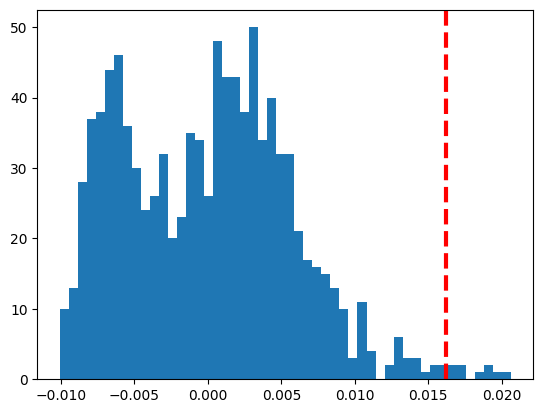

In [10]:
plt.hist(h, bins = 50)
plt.axvline(real, color='red', linestyle='dashed', linewidth=3)
plt.show()